In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from itertools import combinations #will told me about this
import scipy.optimize as opt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_score
%matplotlib inline

In [2]:
#create and clean data (I just did this before, I don't need to explain each step again)
d = pd.read_csv("dummy_data.csv")
df = d[["time_spent", "age", "gender", "interests", "location", "demographics", "profession", "income", "indebt", "isHomeOwner", "Owns_Car"]]
df["gender"] = preprocessing.LabelEncoder().fit(["male", "female", "non-binary"]).transform(df["gender"])
df["interests"] = preprocessing.LabelEncoder().fit(["Sports", "Travel", "Lifestlye"]).transform(df["interests"])
df["location"] = preprocessing.LabelEncoder().fit(["United States", "United Kingdom", "Australia"]).transform(df["location"])
df["demographics"] = preprocessing.LabelEncoder().fit(["Urban", "Sub_Urban", "Rural"]).transform(df["demographics"])
df["profession"] = preprocessing.LabelEncoder().fit(["Student", "Software Engineer", "Marketer Manager"]).transform(df["profession"]) #these throw harmless warnings.
df["indebt"] = preprocessing.LabelEncoder().fit(["False", "True"]).transform(df["indebt"])
df["isHomeOwner"] = preprocessing.LabelEncoder().fit(["False", "True"]).transform(df["isHomeOwner"])
df["Owns_Car"] = preprocessing.LabelEncoder().fit(["False", "True"]).transform(df["Owns_Car"])
X = df[["time_spent", "age", "gender", "interests", "location", "demographics", "profession", "income", "indebt", "isHomeOwner", "Owns_Car"]].values.astype(float) 
features = ["age", "gender", "interests", "demographics", "profession", "income", "indebt", "isHomeOwner", "Owns_Car"]
ind = df[features]
deps = df[["time_spent"]]
ind = pd.DataFrame(preprocessing.StandardScaler().fit(ind).transform(ind))
ind.columns = features

/var/folders/np/wt2f_g3s42g_nygnmnbpcswr0000gn/T/ipykernel_24471/926083657.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["gender"] = preprocessing.LabelEncoder().fit(["male", "female", "non-binary"]).transform(df["gender"])
/var/folders/np/wt2f_g3s42g_nygnmnbpcswr0000gn/T/ipykernel_24471/926083657.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["interests"] = preprocessing.LabelEncoder().fit(["Sports", "Travel", "Lifestlye"]).transform(df["interests"])
/var/folders/np/wt2f_g3s42g_nygnmnbpcsw

In [3]:
#inspect our independent variables
ind.head()

,age,gender,interests,demographics,profession,income,indebt,isHomeOwner,Owns_Car
0,1.112882,-0.001228,0.015896,1.244883,0.056541,1.609380,1.006018,-1.016130,-1.081294
1,0.371652,-1.229356,1.238658,1.244883,1.285703,-1.505106,1.006018,0.984126,0.924818
2,-0.666069,-0.001228,0.015896,0.018397,-1.172620,-0.594094,-0.994018,-1.016130,-1.081294
3,1.409373,1.226900,1.238658,1.244883,1.285703,-0.850422,-0.994018,0.984126,-1.081294
4,-1.184929,-0.001228,-1.206866,1.244883,0.056541,-0.151776,-0.994018,0.984126,0.924818


In [4]:
#for logistic regression, we should make the dependent variable categorical
print(deps.head)
new_deps = []
for cat in deps.time_spent:
    if int(cat) > 4: new_deps.append(1)
    else: new_deps.append(0)
new_deps = np.asarray(new_deps)
new_deps[0:5]

<bound method NDFrame.head of      time_spent
0             3
1             2
2             8
3             5
4             1
..          ...
995           8
996           6
997           5
998           4
999           8

[1000 rows x 1 columns]>


array([0, 0, 1, 1, 0])

In [5]:
#create a list of all possible combinations of features
feature_combs = []
for length in range(1, len(features) + 1):
    feature_combs.extend(list(combinations(features, length)))

In [6]:
acc_list = []
for comb in feature_combs:
    comb_ind = ind[list(comb)]
    train_d, test_d, train_i, test_i = train_test_split(new_deps, comb_ind, test_size=0.2, random_state=5) #split data
    m = LogisticRegression(C=0.01, solver='liblinear').fit(train_i,train_d)
    yhat = m.predict(test_i)  #generates predictions for model m on test set
    acc = metrics.accuracy_score(test_d, yhat) #gets accuracy score on test set
    acc_list.append([acc])

In [7]:
max(acc_list) #considering random would be 0.5 accuracy, is this more impressive? Let's try different solvers.

[0.62]

In [8]:
acc_list = []
for comb in feature_combs:
    comb_ind = ind[list(comb)]
    train_d, test_d, train_i, test_i = train_test_split(new_deps, comb_ind, test_size=0.2, random_state=5) #split data
    m = LogisticRegression(C=0.01, solver='newton-cholesky').fit(train_i,train_d)
    yhat = m.predict(test_i)  #generates predictions for model m on test set
    acc = metrics.accuracy_score(test_d, yhat) #gets accuracy score on test set
    acc_list.append([acc])
max(acc_list)

[0.61]

In [9]:
acc_list = []
for comb in feature_combs:
    comb_ind = ind[list(comb)]
    train_d, test_d, train_i, test_i = train_test_split(new_deps, comb_ind, test_size=0.2, random_state=5) #split data
    m = LogisticRegression(C=0.01, solver='lbfgs').fit(train_i,train_d)
    yhat = m.predict(test_i)  #generates predictions for model m on test set
    acc = metrics.accuracy_score(test_d, yhat) #gets accuracy score on test set
    acc_list.append([acc])
max(acc_list)

[0.61]

In [10]:
acc_list = []
for comb in feature_combs:
    comb_ind = ind[list(comb)]
    train_d, test_d, train_i, test_i = train_test_split(new_deps, comb_ind, test_size=0.2, random_state=5) #split data
    m = LogisticRegression(C=0.01, solver='sag').fit(train_i,train_d)
    yhat = m.predict(test_i)  #generates predictions for model m on test set
    acc = metrics.accuracy_score(test_d, yhat) #gets accuracy score on test set
    acc_list.append([acc])
max(acc_list)

[0.61]

In [11]:
acc_list = []
for comb in feature_combs:
    comb_ind = ind[list(comb)]
    train_d, test_d, train_i, test_i = train_test_split(new_deps, comb_ind, test_size=0.2, random_state=5) #split data
    m = LogisticRegression(C=0.01, solver='saga').fit(train_i,train_d)
    yhat = m.predict(test_i)  #generates predictions for model m on test set
    acc = metrics.accuracy_score(test_d, yhat) #gets accuracy score on test set
    acc_list.append([acc])
max(acc_list)

[0.61]

In [ ]:
#liblinear seems to be pretty clearly the best one. Let's try different C values

In [12]:
acc_list = []
for comb in feature_combs:
    comb_ind = ind[list(comb)]
    train_d, test_d, train_i, test_i = train_test_split(new_deps, comb_ind, test_size=0.2, random_state=5) #split data
    for c_val in [0.001, 0.005, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.5, 1.0]:
        m = LogisticRegression(C=c_val, solver='liblinear').fit(train_i,train_d)
        yhat = m.predict(test_i)  #generates predictions for model m on test set
        acc = metrics.accuracy_score(test_d, yhat) #gets accuracy score on test set
        acc_list.append([acc, c_val])

In [13]:
max(acc_list)

[0.62, 0.01]

In [14]:
#okay. maybe...

In [15]:
acc_list = []
for comb in feature_combs:
    comb_ind = ind[list(comb)]
    train_d, test_d, train_i, test_i = train_test_split(new_deps, comb_ind, test_size=0.2, random_state=5) #split data
    for c_val in [0.006, 0.007, 0.008, 0.0085, 0.0090, 0.0095, 0.0096, 0.0097, 0.0098, 0.0099, 0.01, 0.0101, 0.0102, 0.0103, 0.0104, 0.0105, 0.0106, 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017]:
        m = LogisticRegression(C=c_val, solver='liblinear').fit(train_i,train_d)
        yhat = m.predict(test_i)  #generates predictions for model m on test set
        acc = metrics.accuracy_score(test_d, yhat) #gets accuracy score on test set
        acc_list.append([acc, c_val])
max(acc_list)

[0.62, 0.017]

In [16]:
#okay, but I think that's just considering the c_val as important in the MAX. I should plot this. But first, let's try a better scoring metric.

In [23]:
acc_list = []
for comb in feature_combs:
    comb_ind = ind[list(comb)]
    train_d, test_d, train_i, test_i = train_test_split(new_deps, comb_ind, test_size=0.2, random_state=5) #split data
    m = LogisticRegression(C=0.01, solver='liblinear').fit(train_i,train_d)
    yhat = m.predict(test_i)  #generates predictions for model m on test set
    acc = jaccard_score(test_d, yhat,pos_label=0) #gets jaccard score on test set
    acc_list.append([acc])
max(acc_list)

[0.21]

In [24]:
#wow, that's bad. let's see the confusion matrix for the best model we have on all of the data

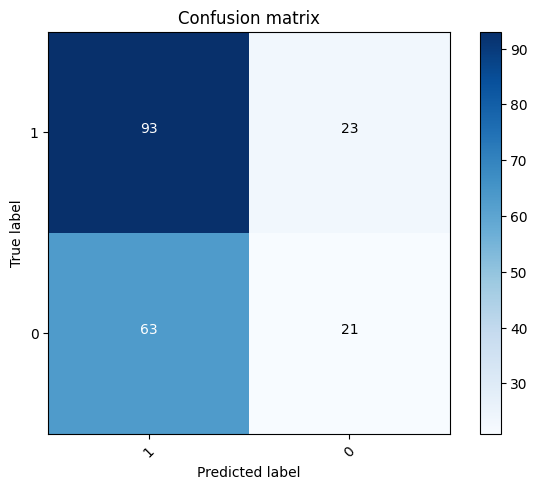

In [26]:
# Compute confusion matrix    ---- THIS IS CODE FROM THE LOGISTIC REGRESSION LAB. I DID NOT WRITE THIS
train_d, test_d, train_i, test_i = train_test_split(new_deps, ind, test_size=0.2, random_state=5) #split data
m = LogisticRegression(C=0.01, solver='liblinear').fit(train_i,train_d)
yhat = m.predict(test_i)
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cnf_matrix = confusion_matrix(test_d, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['1','0'],normalize= False,  title='Confusion matrix')

In [ ]:
#that's not fantastic either. 

In [28]:
#let's check the probability using log_loss
from sklearn.metrics import log_loss
prob = m.predict_proba(test_i)
log_loss(test_d, prob)

0.6884879265364838

In [ ]:
#while the accuracy of the model is poor, its probabilistic prediciton seems actually to be pretty refined.